In [37]:
import pandas as pd
!pip install openpyxl

In [144]:
dm_dclientes = pd.read_excel('/content/DM_Dimensoes.xlsx')
dm_dcupons = pd.read_csv('/content/DM_FatoCabecalho.txt', sep='\t')
dm_fvendas = pd.read_csv('/content/DM_FatoDetalhes.csv', sep=';')

In [145]:
columns=['Valor','Desconto','Custo','ValorLiquido']
dm_fvendas[columns]=dm_fvendas[columns].replace({',': '.'}, regex=True).astype(float)


In [146]:
produtos = dm_fvendas.groupby(['ProdutoID'])['Quantidade','Valor'].sum()
produtos['Preco_Medio']=produtos['Valor']/produtos['Quantidade']
c_produtos = produtos[['Preco_Medio','Quantidade']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [147]:
c_produtos

,Preco_Medio,Quantidade
ProdutoID,,
1,21.998080,828
2,21.247994,1067
3,20.144253,388
4,24.141736,455
5,6.519497,298
...,...,...
73,1.178378,296
74,31.323502,297
75,8.135833,1315


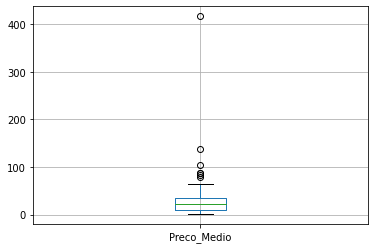

In [148]:
c_produtos.boxplot(['Preco_Medio'])

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [149]:
normalizar_dados = StandardScaler()
dados_normalizados = normalizar_dados.fit_transform(c_produtos)

In [150]:
dados_normalizados

array([[-0.21595062,  0.46138211],
       [-0.23072051,  1.18715481],
       [-0.25245423, -0.87476848],
       [-0.17374   , -0.67130919],
       [-0.52073854, -1.14807201],
       [-0.5696415 , -0.99016331],
       [ 0.15053389,  0.30651011],
       [-0.22636319, -0.91424566],
       [ 0.2726333 , -1.74933978],
       [-0.50812643,  0.24273928],
       [-0.0615796 ,  0.09090399],
       [-0.44587004, -0.9840899 ],
       [-0.13109586,  0.70128187],
       [-0.15735237, -0.37371201],
       [-0.52289464, -1.68253225],
       [-0.44787497,  1.53333928],
       [-0.12054683,  0.91688799],
       [-0.090335  , -0.4162259 ],
       [-0.45764979,  0.14252799],
       [ 1.05425728, -1.06000754],
       [-0.44152462,  1.0778334 ],
       [-0.58006076, -0.95068613],
       [-0.46226116, -0.25528048],
       [-0.55631226,  1.51511905],
       [-0.35262989, -1.0873379 ],
       [ 0.01838092,  0.23362916],
       [ 0.18457187, -0.94461272],
       [ 0.27862587, -0.1095186 ],
       [ 2.06195465,

In [194]:
def calcular_wcss(dados_normalizados):
  wcss=[]
  for k in range(1,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X=dados_normalizados)
    wcss.append(kmeans.inertia_)
  return wcss


In [197]:
wcss_produtos = calcular_wcss(dados_normalizados)

In [191]:
for i in range(len(wcss_produtos)):
  print(f'O cluster {i} possui valor WCSS de: {wcss_produtos[i]}')


O cluster 0 possui valor WCSS de: 154.0
O cluster 1 possui valor WCSS de: 95.31855195188592
O cluster 2 possui valor WCSS de: 46.4106075570946
O cluster 3 possui valor WCSS de: 29.507001246293413
O cluster 4 possui valor WCSS de: 19.45375299577102
O cluster 5 possui valor WCSS de: 15.179456552250535
O cluster 6 possui valor WCSS de: 11.993867093282855
O cluster 7 possui valor WCSS de: 10.412551786398053
O cluster 8 possui valor WCSS de: 8.209341970577796
O cluster 9 possui valor WCSS de: 6.784602636949333


In [50]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

In [192]:
grafico_wcss = px.line (x=range(1,11),
                        y=wcss_produtos
                        )
fig = go.Figure(grafico_wcss)
fig.update_layout(title='calculando o WCSS',
                  xaxis_title='Número de clusters',
                  yaxis_title='Valor do WCSS',
                  template='plotly_white'
)
 
fig.show()


In [52]:
kmeans_produtos=KMeans(n_clusters=3,random_state=0)
c_produtos['clusters']=kmeans_produtos.fit_predict(dados_normalizados)

In [53]:
c_produtos

,Preco_Medio,Quantidade,clusters
ProdutoID,,,
1,21.998080,828,0
2,21.247994,1067,0
3,20.144253,388,1
4,24.141736,455,1
5,6.519497,298,1
...,...,...,...
73,1.178378,296,1
74,31.323502,297,1
75,8.135833,1315,0


In [54]:
centroides_clusters=kmeans_produtos.cluster_centers_
centroides_clusters

array([[-0.11271086,  0.78990574],
       [-0.08607681, -0.81427411],
       [ 7.55393135,  0.92599811]])

In [62]:
grafico = px.scatter (x=dados_normalizados[:,0],
                        y=dados_normalizados[:,1],
                        color=c_produtos['clusters'])
 
grafico_centroide = px.scatter(x=centroides_clusters[:,0],y=centroides_clusters[:,1],size=[7,7,7])
grafico_final = go.Figure(data=grafico.data+grafico_centroide.data)
grafico_final.update_layout(title='Clusterização',
                  xaxis_title='Preco_Medio',
                  yaxis_title='Quantidade')
 
 
grafico_final.show()


In [63]:
c_produtos['Grupo de Produto'] = c_produtos['clusters'].map({0:"alto volume e baixo preço",1:"baixo volume e baixo preço",2:"alto volume e alto preço"})


In [64]:
c_produtos

,Preco_Medio,Quantidade,clusters,Grupo de Produto
ProdutoID,,,,
1,21.998080,828,0,alto volume e baixo preço
2,21.247994,1067,0,alto volume e baixo preço
3,20.144253,388,1,baixo volume e baixo preço
4,24.141736,455,1,baixo volume e baixo preço
5,6.519497,298,1,baixo volume e baixo preço
...,...,...,...,...
73,1.178378,296,1,baixo volume e baixo preço
74,31.323502,297,1,baixo volume e baixo preço
75,8.135833,1315,0,alto volume e baixo preço


In [101]:
union=pd.merge(dm_fvendas,dm_dcupons,on='CupomID')

In [102]:
union=pd.merge(union,dm_dclientes,on="ClienteID")
union=union[['CupomID','ProdutoID','Quantidade','Desconto','Custo','Valor','ValorLiquido','ClienteID','FuncionarioID','Pais','Regiao']]

In [103]:
union

,CupomID,ProdutoID,Quantidade,Desconto,Custo,Valor,ValorLiquido,ClienteID,FuncionarioID,Pais,Regiao
0,10308,69,1,0.000,1.8317,2.12,0.2883,2,2,Mexico,North America
1,10308,70,5,0.000,127.6560,147.75,20.0940,2,2,Mexico,North America
2,10625,60,10,0.000,39.4470,48.70,9.2530,2,3,Mexico,North America
3,10625,14,3,0.000,58.9275,72.75,13.8225,2,3,Mexico,North America
4,10625,42,5,0.000,60.4260,74.60,14.1740,2,3,Mexico,North America
...,...,...,...,...,...,...,...,...,...,...,...
2167,10359,60,80,21.840,377.3952,458.64,81.2448,72,9,UK,Europe
2168,10359,16,56,28.672,495.4522,602.11,106.6598,72,9,UK,Europe
2169,10359,31,70,30.450,526.1760,639.45,113.2740,72,9,UK,Europe
2170,11081,75,150,105.750,943.7781,1163.25,219.4719,78,11,USA,North America


In [104]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [105]:
union['cod_Pais']=LE.fit_transform(union['Pais'])
union['cod_Regiao']=LE.fit_transform(union['Regiao'])

In [435]:
union_final=union[['CupomID','ProdutoID','Quantidade','Desconto','Custo','Valor','ValorLiquido','ClienteID','FuncionarioID','cod_Pais','cod_Regiao']]
union_final['Preco_unit']=(union_final['Valor']-union_final['Desconto'])/union_final['Quantidade']
union_final['Desconto?']=[1 if s>0 else 0 for s in union_final['Desconto']] 
union_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CupomID,ProdutoID,Quantidade,Desconto,Custo,Valor,ValorLiquido,ClienteID,FuncionarioID,cod_Pais,cod_Regiao,Preco_unit,Desconto?
0,10308,69,1,0.000,1.8317,2.12,0.2883,2,2,11,1,2.120000,0
1,10308,70,5,0.000,127.6560,147.75,20.0940,2,2,11,1,29.550000,0
2,10625,60,10,0.000,39.4470,48.70,9.2530,2,3,11,1,4.870000,0
3,10625,14,3,0.000,58.9275,72.75,13.8225,2,3,11,1,24.250000,0
4,10625,42,5,0.000,60.4260,74.60,14.1740,2,3,11,1,14.920000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,10359,60,80,21.840,377.3952,458.64,81.2448,72,9,18,0,5.460000,1
2168,10359,16,56,28.672,495.4522,602.11,106.6598,72,9,18,0,10.239964,1
2169,10359,31,70,30.450,526.1760,639.45,113.2740,72,9,18,0,8.700000,1
2170,11081,75,150,105.750,943.7781,1163.25,219.4719,78,11,19,1,7.050000,1


In [421]:
lista = union_final['ProdutoID'].unique().reshape(-1,1)
cor=[]
for k in lista:
  columns=['Quantidade','Preco_unit']
  x=union_final[columns].loc[union_final['ProdutoID']==k[0]].corr()
  cor.append(x['Quantidade'].loc['Preco_unit'])

In [455]:
correlacoes=pd.DataFrame({'ProdutoID':union_final['ProdutoID'].unique() , 'Correlacao': cor})
correlacoes.sort_values(by='Correlacao').reset_index(drop=True)

,ProdutoID,Correlacao
0,3,-0.587778
1,37,-0.572479
2,66,-0.505345
3,74,-0.474948
4,49,-0.428714
...,...,...
72,9,0.365551
73,58,0.393528
74,50,0.430930
75,47,0.441808


In [461]:
grafico = px.scatter (x=union_final['Quantidade'].loc[union_final['ProdutoID']==3],
                        y=union_final['Preco_unit'].loc[union_final['ProdutoID']==3])

grafico.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



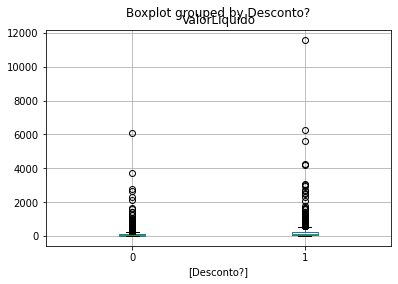

In [475]:
union_final.boxplot(column=['ValorLiquido'], by=['Desconto?'])

In [479]:
grafico = px.scatter (x=union_final['Desconto'].loc[union_final['Desconto']!=0],
                        y=union_final['Valor'].loc[union_final['Desconto']!=0])

grafico.show()

In [493]:
import numpy
mean_cd = numpy.mean(union_final['ValorLiquido'].loc[union_final['Desconto']==0])
sd_cd = numpy.std(union_final['ValorLiquido'].loc[union_final['Desconto']==0])

mean_sd = numpy.mean(union_final['ValorLiquido'].loc[union_final['Desconto']!=0])
sd_sd = numpy.std(union_final['ValorLiquido'].loc[union_final['Desconto']!=0])
print(mean_cd, mean_sd, sd_cd, sd_sd)

258.7788773317593 108.42664777358495 628.151642993937 281.05195454657246


In [491]:
print(union_final['ValorLiquido'].loc[union_final['Desconto']==0].count(),
      union_final['ValorLiquido'].loc[union_final['Desconto']!=0].count())

847 1325


In [494]:
mean_cd = numpy.mean(union_final['Quantidade'].loc[union_final['Desconto']==0])
sd_cd = numpy.std(union_final['Quantidade'].loc[union_final['Desconto']==0])

mean_sd = numpy.mean(union_final['ValorLiquido'].loc[union_final['Desconto']!=0])
sd_sd = numpy.std(union_final['ValorLiquido'].loc[union_final['Desconto']!=0])
print(mean_cd, mean_sd, sd_cd, sd_sd)

27.51003541912633 108.42664777358495 21.173251282986445 281.05195454657246


3565.2066384615387 1365.0867115384613 2910.7710634655064 1285.0557500075852
13 26


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



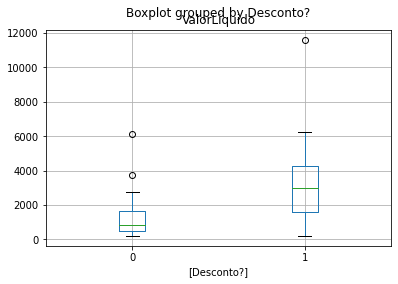

In [506]:
j=76
mean_cd = numpy.mean(union_final['ValorLiquido'].loc[union_final['Desconto']==0].loc[union_final['ProdutoID']==j])
sd_cd = numpy.std(union_final['ValorLiquido'].loc[union_final['Desconto']==0].loc[union_final['ProdutoID']==j])

mean_sd = numpy.mean(union_final['ValorLiquido'].loc[union_final['Desconto']!=0].loc[union_final['ProdutoID']==j])
sd_sd = numpy.std(union_final['ValorLiquido'].loc[union_final['Desconto']!=0].loc[union_final['ProdutoID']==j])

print(mean_cd, mean_sd, sd_cd, sd_sd)

union_final.loc[union_final['ProdutoID']==j].boxplot(column=['ValorLiquido'], by=['Desconto?'])

print(union_final['ValorLiquido'].loc[union_final['Desconto']==0].loc[union_final['ProdutoID']==j].count(),
      union_final['ValorLiquido'].loc[union_final['Desconto']!=0].loc[union_final['ProdutoID']==j].count())